# Домашнее задание

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 10,7

import seaborn as sns


In [159]:
data = pd.read_excel('Suicide_data.xlsx')
data.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.711409,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.194805,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.832585,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.587156,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.281079,Albania1987,NaN,"2,156,624,900",796,Boomers


In [160]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


Столбец HDI for year имеет большое количество незаполненных строк (HDI - индекс человеческого развития для данного года). Так как данные неполные, то данный столбец в расчетах использовать не будем. Остальные столбцы заполнены полностью.

### Посмотрим, меняется ли как-то общее количество самоубийств со временем
Будем использовать столбчатую диаграмму, так как она позволяет наглядно увидеть различия по годам

In [161]:
grouped_by_year = data.groupby('year').sum()[['suicides_no']].reset_index()
grouped_by_year.head()


,year,suicides_no
0,1985,116063
1,1986,120670
2,1987,126842
3,1988,121026
4,1989,160244


Text(0.5, 1.0, 'Suicide level in the World from 1985 to 2016')

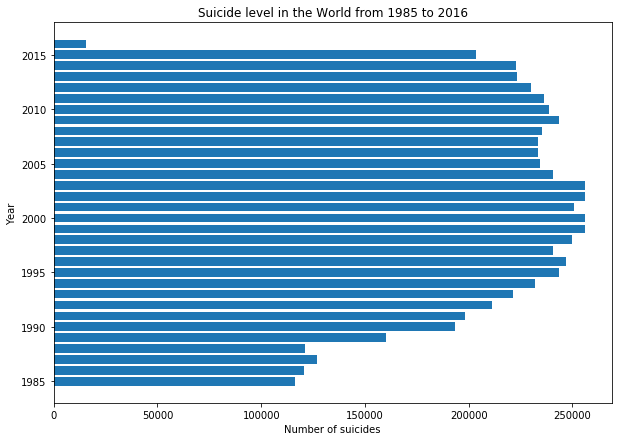

In [162]:
plt.barh(grouped_by_year['year'], grouped_by_year['suicides_no'])
plt.xlabel('Number of suicides')
plt.ylabel('Year')
plt.title('Suicide level in the World from 1985 to 2016')


Вероятно, в нашем датасете неполные данные за 2016 год (слишком резкое уменьшение уровня самоубийств). В дальнейшем исключим 2016 год из расчетов.

Видим, что с 1985 по 1990 уровень самоубийств значительно ниже, чем в дальнейшем (возможно это связано с плохим сбором стастистики), затем до 1995 количество самоубийств постоянно растет от года к году и после 1995 выходит на примерно постоянное значение (с 1995 по 2010 уровень колебелется, то увеличиваясь, то уменьшаясь). С 2010 по 2015 количество самоубийтсв пошло на убыль, но является ли это тенденцией на последующие года сказать нельзя. 

Года с максимальным уровнем самоубийств - 1999, 2000, 2002, 2003.

In [163]:
data_without_2016 = data[data['year'] != 2016]
data_without_2016.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.711409,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.194805,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.832585,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.587156,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.281079,Albania1987,NaN,"2,156,624,900",796,Boomers


### Посмотрим, как зависит количество самоубийств от возраста для мужчин и для женщин
Также будем использовать столбчатую диаграмму, отдельно для мужчин и отдельно для женщин. Это позволит сравнивать показатели подвум параметрам сразу - по возрасту и по полу.

In [164]:
result = data_without_2016.groupby(['age','sex']).sum()[['suicides_no']]
result

suicides_no
age         sex                
15-24 years female       175199
            male         632148
25-34 years female       208450
            male         913392
35-54 years female       505001
            male        1941374
5-14 years  female        16997
            male          35267
55-74 years female       428917
            male        1224811
75+ years   female       221442
            male         429819

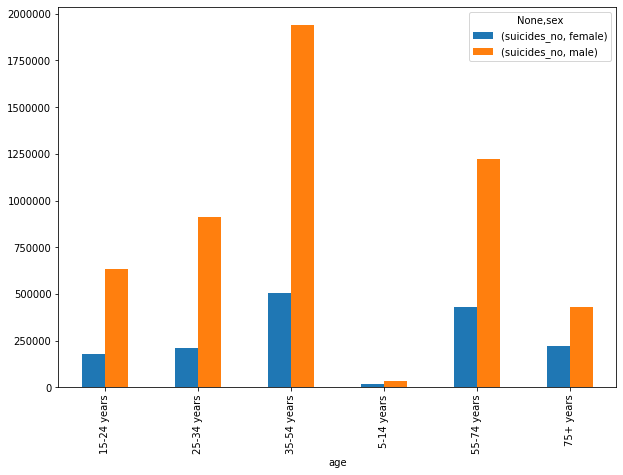

In [165]:
result.unstack().plot(kind='bar')

Из графика видно, что больше всего самоубийств происходит в возрасте 35-54 года, причем мужчины делают это почти в 4 раза чаще, чем женщины.

### Посмотрим, как зависит количество самоубийств от поколения

- G.I. Generation - рожденные между 1901 - 1927
- Silent - рожденные между 1925 - 1942
- Boomers - рожденные между 1946 - 1964
- Generation X - рожденные между 1960 - 1980
- Millennials - рожденные между 1980 - early 2000
- Generation Z - рожденные между середина 90х - 2000ых

In [166]:
grouped_by_generation = data_without_2016.groupby(['age','generation']).sum()[['suicides_no']].sort_values(by = 'suicides_no', ascending = False).reset_index()
grouped_by_generation

,age,generation,suicides_no
0,35-54 years,Boomers,1689019
1,55-74 years,Silent,1158519
2,25-34 years,Generation X,640551
3,35-54 years,Generation X,485848
4,15-24 years,Millenials,413035
5,15-24 years,Generation X,394312
6,75+ years,Silent,349860
7,25-34 years,Boomers,304163
8,75+ years,G.I. Generation,301401
9,55-74 years,Boomers,286601


Так как в предыдущем графике мы видели, что пик самоубийств приходится на возраст 35-54 года - будем рассматривать этот срез. Также из рассмотрения выкинем два последних поколения, так как люди из них еще не все достигли рассматриваемого возраста.

In [167]:
filtered_data = grouped_by_generation[(grouped_by_generation.age == '35-54 years')][['generation', 'suicides_no']]
filtered_data = filtered_data.groupby('generation').sum()[['suicides_no']]
filtered_data 

,suicides_no
generation,
Boomers,1689019
Generation X,485848
Silent,271508


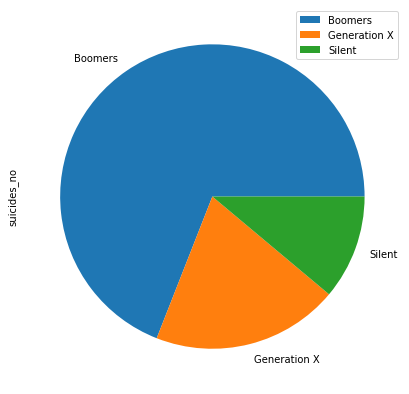

In [168]:
filtered_data.plot(kind='pie', y='suicides_no')

Видим, что на поколением Boomers приходится самая большая доля самоубийств, совершенных в возрасте 35-54 года.
В данном случае использование круговой диграммы опрадвано, так как у нас мало величин которые мы сравниваем и различия между ними хорошо видны.

### Посмотрим есть ли зависимость количества самоубийств от уровня ВВП на душу населения
Будем использовать pair plot (scatter plot matrix). Эта визуализация поможет посмотреть на одной картинке, как связаны между собой количество самоубийств и величина ВВП на душу населения.

In [83]:
result = data_without_2016.groupby(['country','year']).agg({'suicides/100k pop': 'sum', 'gdp_per_capita ($)':'mean'}).reset_index()
result.head()

,country,year,suicides/100k pop,gdp_per_capita ($)
0,Albania,1987,31.850587,796
1,Albania,1988,32.452945,769
2,Albania,1989,33.390925,833
3,Albania,1992,18.004789,251
4,Albania,1993,32.577653,437


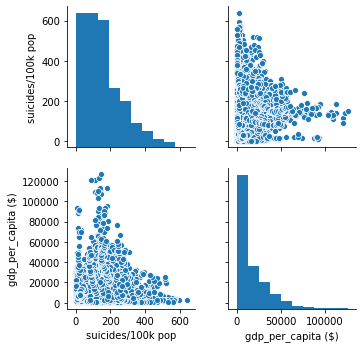

In [84]:
sns_plot = sns.pairplot(
    result[['suicides/100k pop', 'gdp_per_capita ($)']])
sns_plot

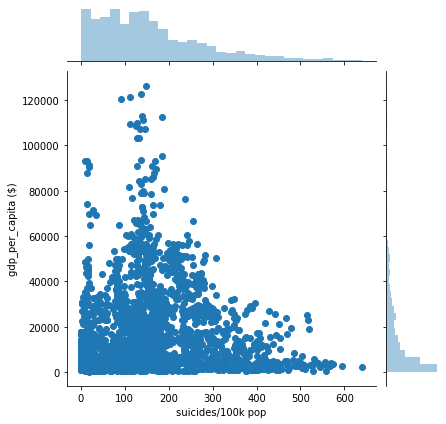

In [85]:
 sns.jointplot(x='suicides/100k pop', y='gdp_per_capita ($)', data=result, kind='scatter')

Из данных графиков видно, что при низком уровне ВВП связи между уровнем самоубийств и величиной ВВП нет. Также можно отметить, что существует некое пороговое значение количества самоубийств (примерно 150 на 100 тысяч насления), которое не зависит от уровня ВВП. Однако с ростом ВВП на душу населения можно отметить уменьшение количества самоубийств.

### Посмотрим распределение количества самоубийств по странам в 2000 году
Будем снова использовать столбчатую диграмму, так как она обеспечиваеи хорошую наглядность в нашем случае.

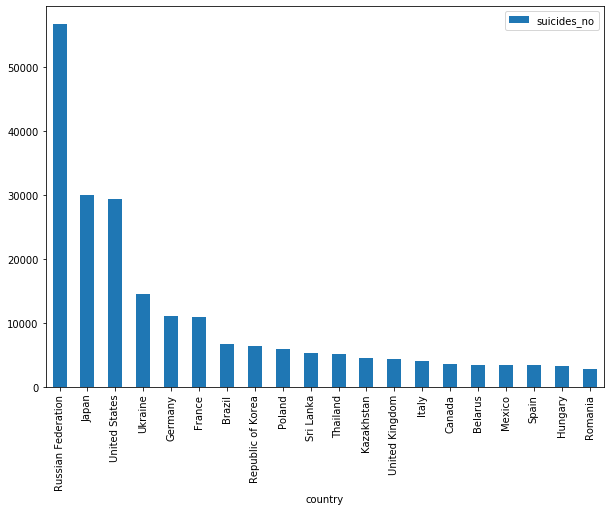

In [179]:
df = data[data['year'] == 2000]
top_20 = df.groupby('country').sum()[['suicides_no']].sort_values('suicides_no', ascending = False).head(20)
top_20.plot(kind='bar')

Видим печальную статистику для нашей страны. Причем уровень самоубийств почти в 2 раза выше, чем в Японии, которая занимает второе место.